## Readreflex example usage

In [1]:
## Basic imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 9]


The central strucuture revolves around the "radargram" object that provides reading, plotting and writing routines

In [2]:
from readreflex.readreflex import radargram

Create the object: 

In [3]:
radardata=radargram()

No file format was given, assuming .par


We provide some example data. It is 400 Mhz horn antenna data measured with a GSSI system, imported into ReflexW

In [4]:
filepath=r'exampledata\testdata.DAT'

In general, reading RefelxW-Data is really really slow as we have to do bytewise decoding of data, trace by trace and that isn't parallelized yet, so for speed, we convert the data to hdf5 after reading it. 
So let's read. 

In [5]:
if os.path.isfile(filepath+'.hdf5'):
    radardata.load_hdf5(filepath)
else:
    radardata.read_data_file(filepath,version=9)
    radardata.save(filepath)

reading file: exampledata\testdata.DAT
Trace increment 0.05000000074505806
Time increment:  (0.1171875,)
Time start:  0.0
X-coord Start: 0.0
Y-coord Start: 0.0
X-coord End: 507.2500076
Y-coord End: 0.0


The library prints out some basic values upon reading the file. 
What's more important: 

### A version needs to be given. 

At some point, ReflexW changed the structure of its byte ordering. 
This had nothing to do with int or float usage, it's the way the values are aranged within the file format. 
Since most of that is undocumented, lots of the reading routines rely on reading hex-values and a bit of guesswork. 

#### Next up is plotting:

(<Figure size 1080x648 with 2 Axes>,
 <AxesSubplot:xlabel='Tracenumber', ylabel='t'>)

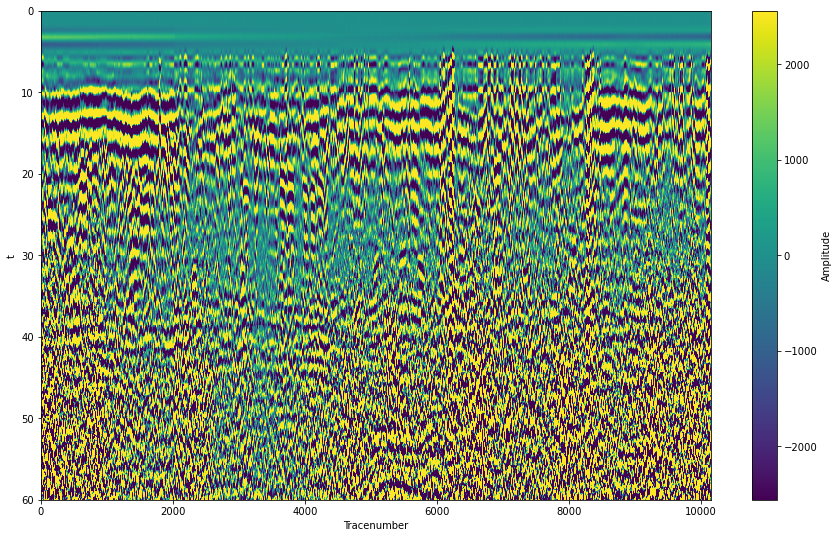

In [6]:
radardata.radarplot()

We are dealing with data that has already been subjected to some background removal

Plotting with different plotting parameters: 

(<Figure size 1080x648 with 2 Axes>,
 <AxesSubplot:xlabel='Distance [m]', ylabel='t'>)

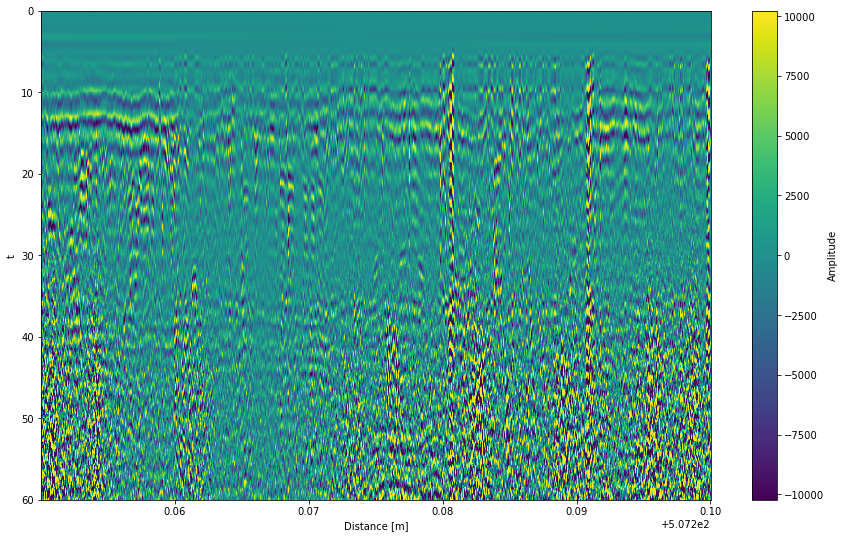

In [7]:
radardata.radarplot(contrast=1,short=False,distanceplot=True)

Accessing the data directly gives the "inherited" numpy array including all methods

In [8]:
(radardata.traces[0,1],radardata.traces[0,1:10],radardata.traces[0,:].shape,radardata.traces.mean().mean())

(0.0,
 array([  0.,   5.,   9.,  12.,  12.,  16.,  14.,  11.,   9.]),
 (512,),
 -0.13536661615414941)

Plotting through accessing the array directly, be aware of the need to swap axes:

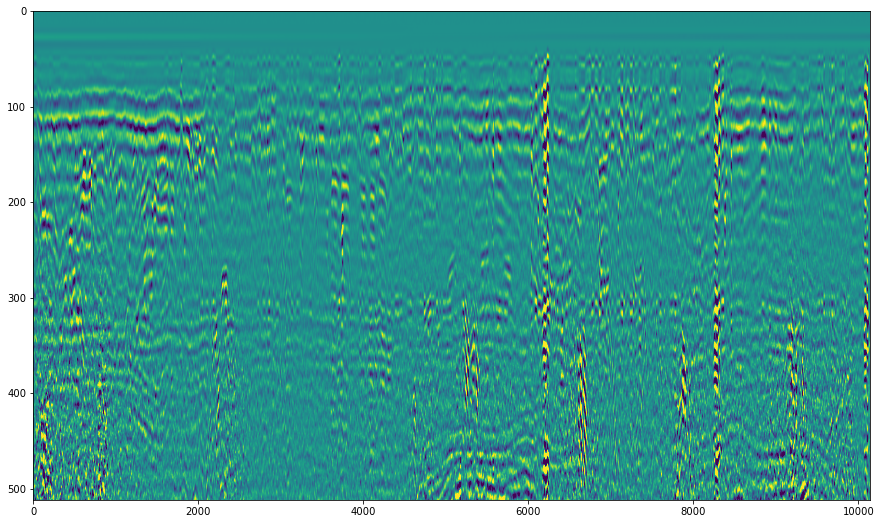

In [9]:
maxmin=np.percentile(radardata.traces,98)
plt.imshow(radardata.traces.T,aspect='auto',vmin=maxmin*-1,vmax=maxmin)

We also can plot traces

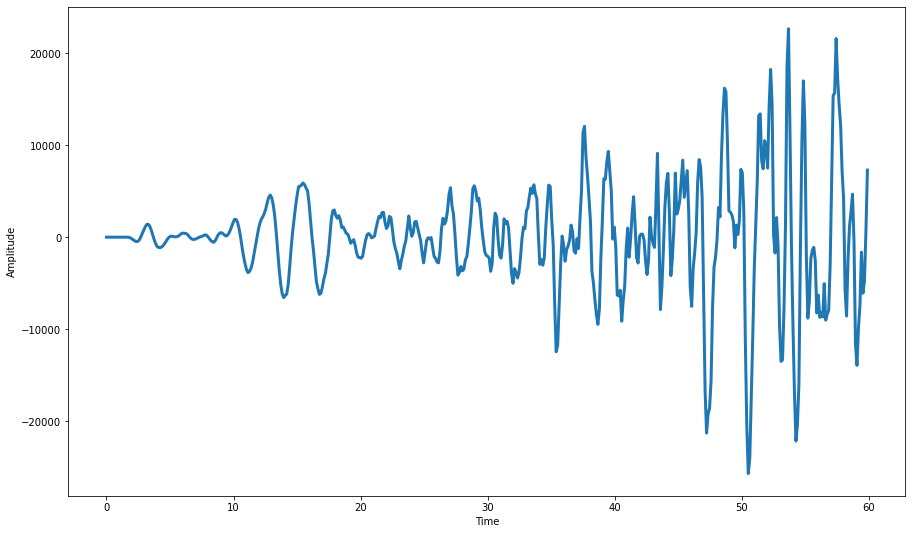

In [10]:
radardata.traceplot([1])

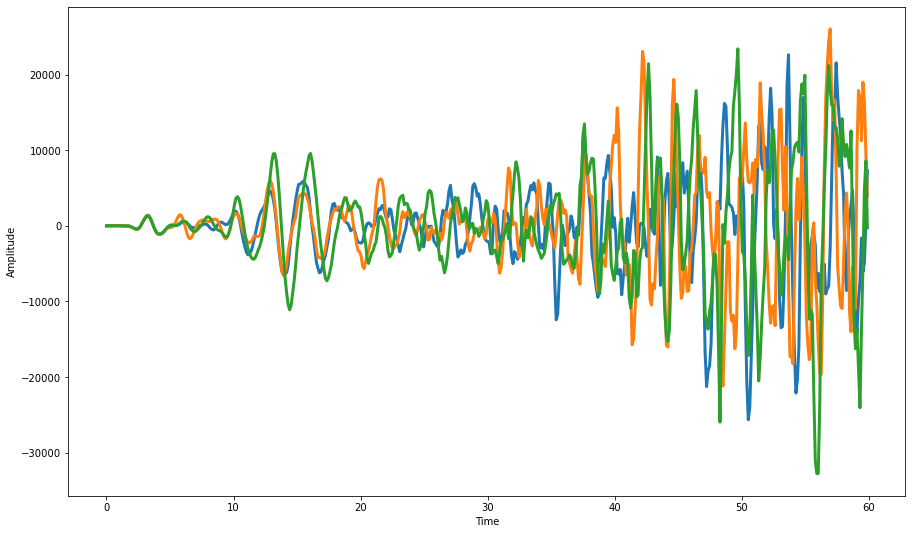

In [11]:
#plot several traces
radardata.traceplot([1,10,100])

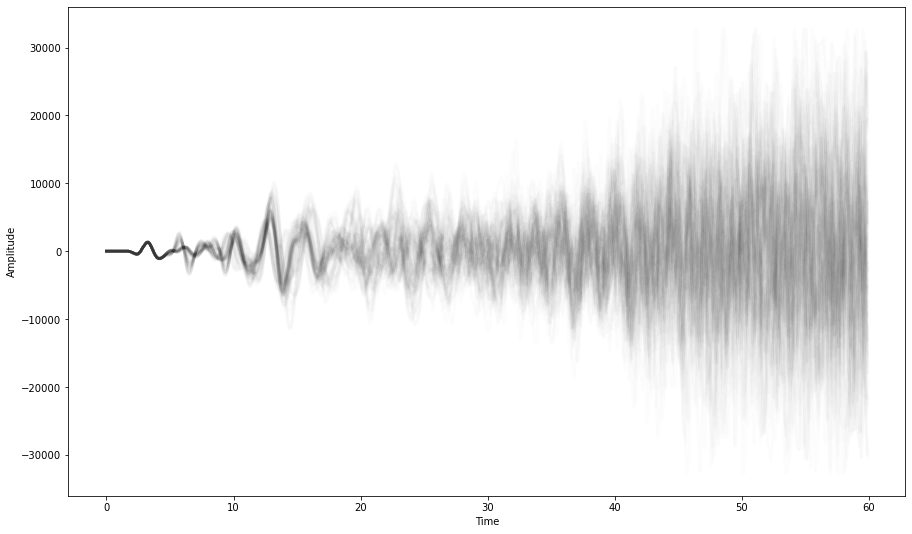

In [12]:
#plot a range of traces with some matplotlib.plot() arguments
radardata.traceplot(np.arange(100),'k',alpha=0.01)

529


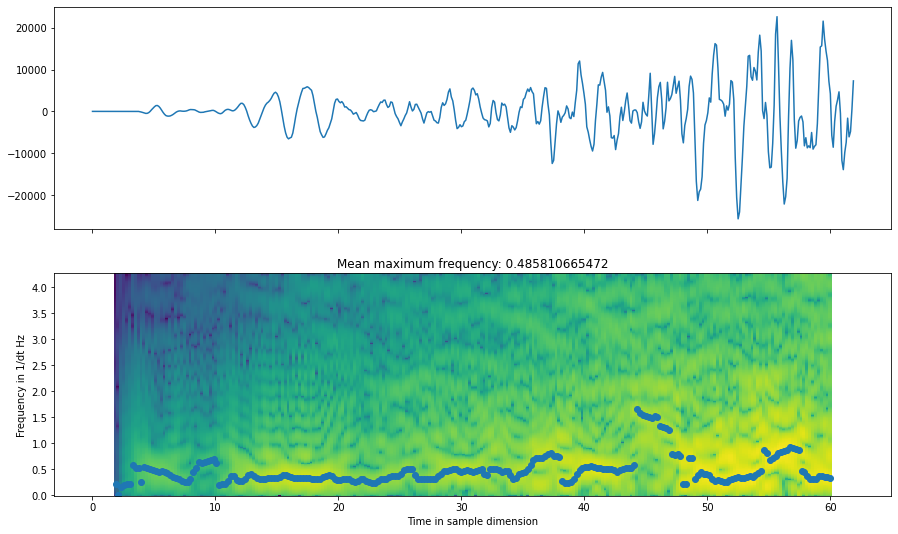

In [13]:
#plot a trace, its spectrogram and the marked most prominent frequency at a given time
# Spectrogram can only be calclated once the window moving over the signal is "full", so 
#an amount of "nperseg" samples is not used, standard is 32
radardata.spectroplot(1)

We can also pad all traces with their last value at the beginning and ending: 

In [14]:
padded=radardata.pad(beginning=32,ending=32,inplace=False)
(padded.traces.shape,radardata.traces.shape)

((10146, 576), (10146, 512))

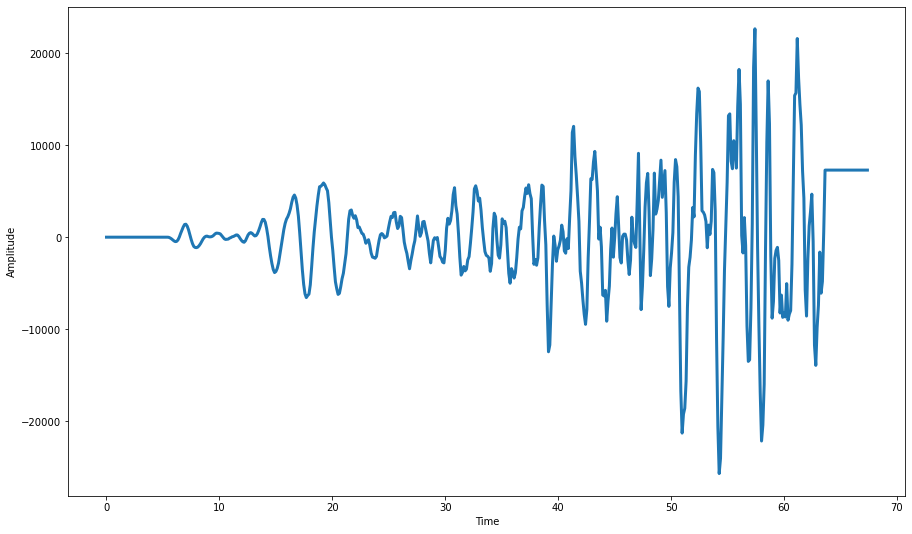

In [15]:
padded.traceplot([1])

593


C:\Users\Riedel\Projekte\Radspot\libraries\readreflexw\readreflex\readreflex.py:480: RuntimeWarning: divide by zero encountered in log
  spec=ax_spectro.pcolormesh(t,f,np.log(Sxx),shading='auto')


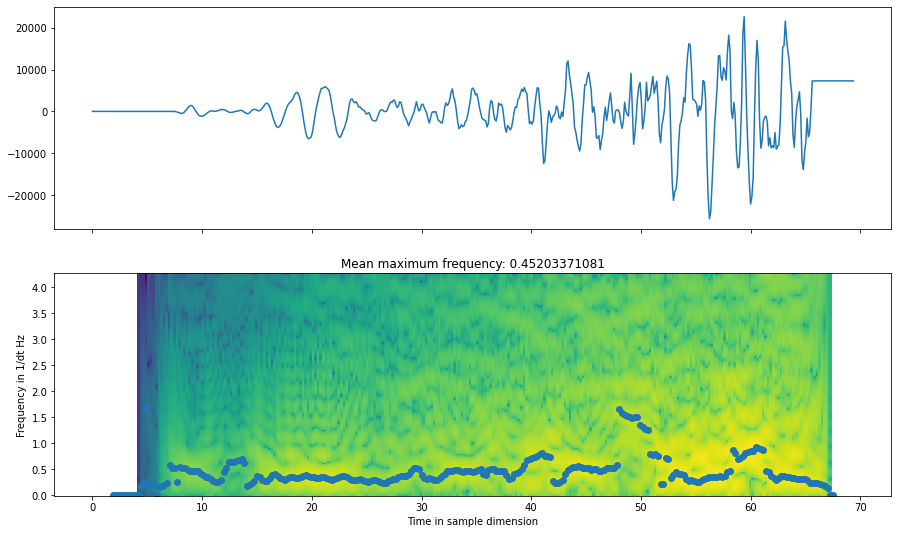

In [16]:
padded.spectroplot(1)

Calculate the envelope of all traces, take trace 1 and plot it
(calculate on single trace yet to be done)


10146it [00:00, 11257.17it/s]


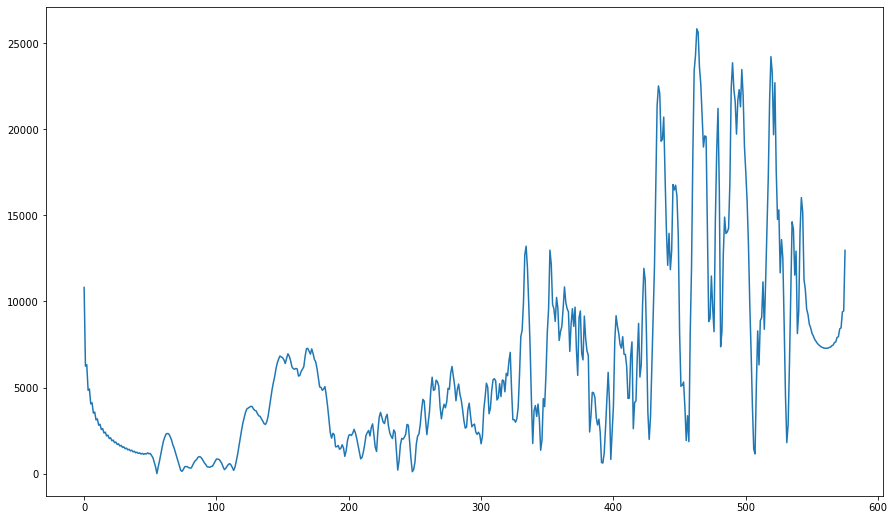

In [17]:
plt.plot(padded.return_envelope()[1])

Resample traces in time, works inplace and does NOT change the time dimension of course

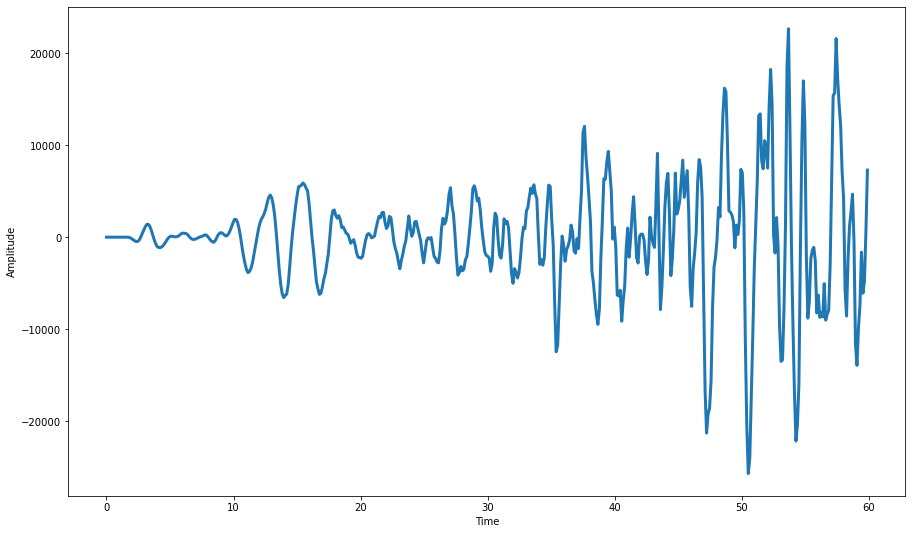

In [18]:
#before:
radardata.traceplot([1])

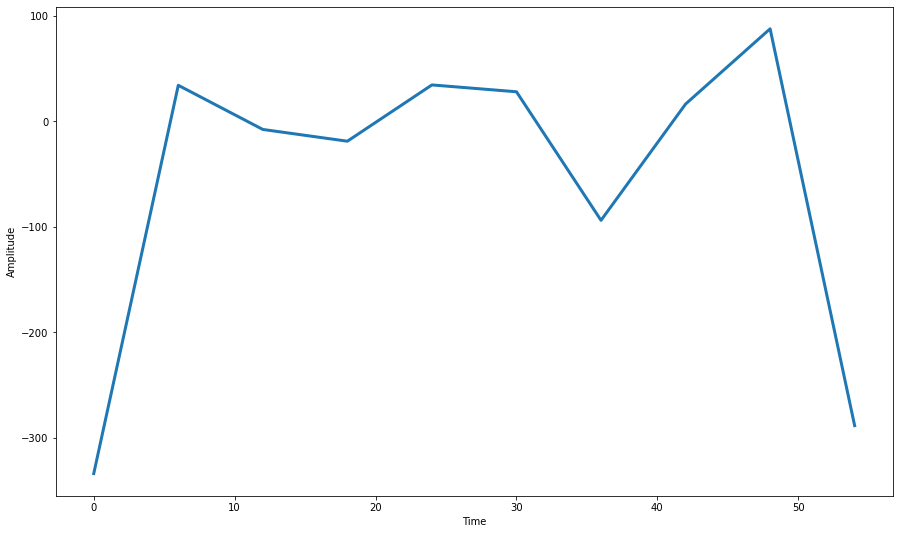

In [19]:
#after
radardata.time_resampling(10)
radardata.traceplot([1])

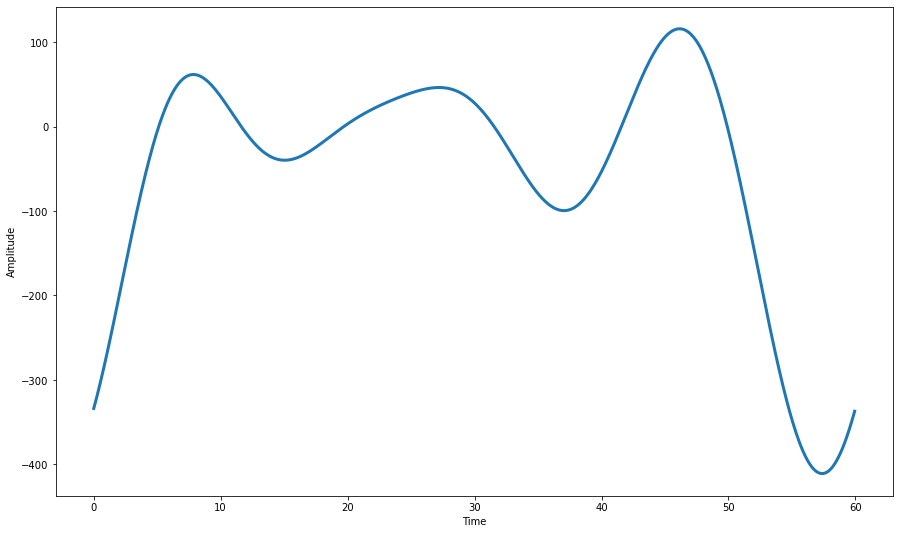

In [20]:
#oversampling works as well
radardata.time_resampling(1024)
radardata.traceplot([1])

1041


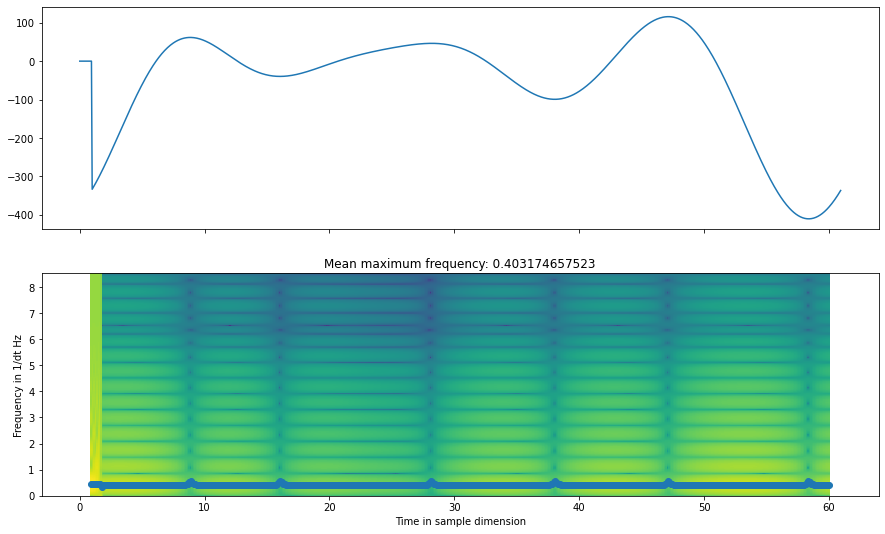

In [21]:
radardata.spectroplot(1)

In [22]:
radardata.save('exampledata\shortened_resampled')